In [ ]:
from google.colab import files
uploaded=files.upload()

Saving fake_and_real_news.csv to fake_and_real_news.csv


Train Set Metrics (one feature):
MSE: 0.25, RMSE: 0.50, MAPE: 1122043086703288.88, R2 Score: 0.00

Test Set Metrics (one feature):
MSE: 0.25, RMSE: 0.50, MAPE: 1084636665707057.12, R2 Score: -0.00

Train Set Metrics (all features):
MSE: 0.02, RMSE: 0.13, MAPE: 241499339200859.88, R2 Score: 0.94

Test Set Metrics (all features):
MSE: 0.02, RMSE: 0.14, MAPE: 265039754243330.59, R2 Score: 0.92

Silhouette Score(k=2): 0.026837824510555445
Calinski-Harabasz Score(k=2): 214.99464737643456
Davies-Bouldin Index(k=2): 6.0476327786993656

k=2: Silhouette=0.026837824510555445, CH=214.99464737643456, DB=6.0476327786993656

k=3: Silhouette=0.029582937717033766, CH=173.1175871983955, DB=5.577061122267929

k=4: Silhouette=0.01676661671269869, CH=146.83774379968148, DB=5.49491732748453

k=5: Silhouette=0.015304772213886344, CH=127.12260511542686, DB=5.78665282992378

k=6: Silhouette=0.018829899394466415, CH=117.98180159462183, DB=5.341597747517252

k=7: Silhouette=0.02584302672923671, CH=114.225320376

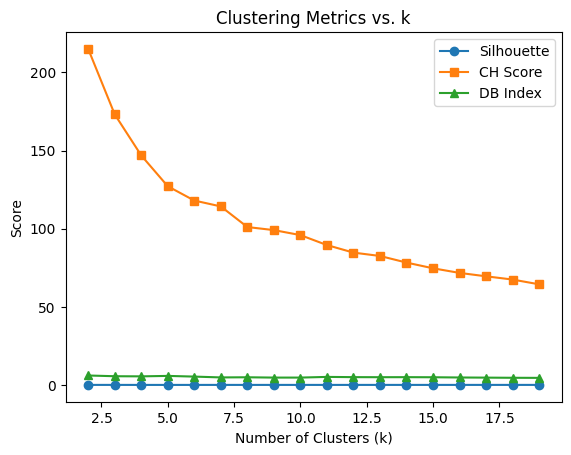

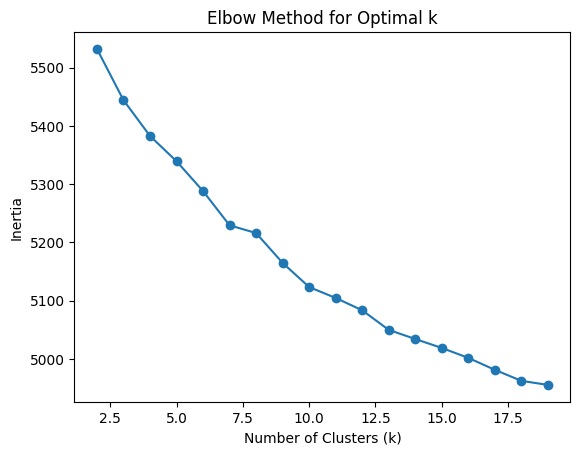

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import (
    mean_squared_error, mean_absolute_percentage_error, r2_score,
    silhouette_score, calinski_harabasz_score, davies_bouldin_score
)
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

# Preprocessing data: Convert text into numerical features using TF-IDF
def preprocess_data(df):
    vectorizer = TfidfVectorizer(max_features=1000)  # Convert text to numerical form
    X = vectorizer.fit_transform(df['Text']).toarray()
    y = df['label'].astype('category').cat.codes.values  # Convert labels to numeric
    return X, y

# Split data into training and test data
def split_data(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression for one feature
def linear_regression_one_feature(X_train, y_train):
    X_train1 = X_train[:, [0]]  # Use only the first feature
    model = LinearRegression().fit(X_train1, y_train)
    return model

# Prediction and regression metrics for one feature
def evaluate_regression_one_feature(model, X_train, X_test, y_train, y_test):
    X_train1 = X_train[:, [0]]
    X_test1 = X_test[:, [0]]

    y_train_pred = model.predict(X_train1)
    y_test_pred = model.predict(X_test1)

    def compute_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}, R2 Score: {r2:.2f}\n")

    print("Train Set Metrics (one feature):")
    compute_metrics(y_train, y_train_pred)
    print("Test Set Metrics (one feature):")
    compute_metrics(y_test, y_test_pred)

# Regression with all features
def evaluate_regression_all_features(X_train, X_test, y_train, y_test):
    model = LinearRegression().fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    def compute_metrics(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}, R2 Score: {r2:.2f}\n")

    print("Train Set Metrics (all features):")
    compute_metrics(y_train, y_train_pred)
    print("Test Set Metrics (all features):")
    compute_metrics(y_test, y_test_pred)

# KMeans clustering
def kmeans_clustering(X_train, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(X_train)
    return kmeans.labels_, kmeans.cluster_centers_

# Clustering metrics
def calculate_clustering_metrics(X_train, kmeans_labels):
    silhouette = silhouette_score(X_train, kmeans_labels)
    ch_score = calinski_harabasz_score(X_train, kmeans_labels)
    db_index = davies_bouldin_score(X_train, kmeans_labels)
    print(f"Silhouette Score(k=2): {silhouette}")
    print(f"Calinski-Harabasz Score(k=2): {ch_score}")
    print(f"Davies-Bouldin Index(k=2): {db_index}\n")

# KMeans clustering for different k values
def kmeans_for_different_k(X_train, max_k):
    silhouette_scores, ch_scores, db_index = [], [], []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train)
        silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
        ch_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))
        db_index.append(davies_bouldin_score(X_train, kmeans.labels_))
        print(f"k={k}: Silhouette={silhouette_scores[-1]}, CH={ch_scores[-1]}, DB={db_index[-1]}\n")

    # Plot clustering metrics
    plt.plot(range(2, max_k), silhouette_scores, marker='o', label='Silhouette')
    plt.plot(range(2, max_k), ch_scores, marker='s', label='CH Score')
    plt.plot(range(2, max_k), db_index, marker='^', label='DB Index')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Score')
    plt.title('Clustering Metrics vs. k')
    plt.legend()
    plt.show()

# Elbow method
def elbow_method(X_train):
    distortions = []
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train)
        distortions.append(kmeans.inertia_)

    plt.plot(range(2, 20), distortions, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Load and process the dataset
df = load_dataset("fake_and_real_news.csv")
X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = split_data(X, y)

# Run regression models
model_one_feature = linear_regression_one_feature(X_train, y_train)
evaluate_regression_one_feature(model_one_feature, X_train, X_test, y_train, y_test)
evaluate_regression_all_features(X_train, X_test, y_train, y_test)

# Run clustering models
kmeans_labels, kmeans_centers = kmeans_clustering(X_train, 2)
calculate_clustering_metrics(X_train, kmeans_labels)
kmeans_for_different_k(X_train, 20)
elbow_method(X_train)
